# Protocolo Básico para a Aplicação das Técnicas de Machine Learning em Economia

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Protocolo básico para a aplicação de técnicas de Machine Learning em Economia

### Referências

* Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media, 2019.
* Athey, S., & Imbens, G. (2017). "The State of Applied Econometrics: Causality and Policy Evaluation." *Journal of Economic Perspectives*.
* Mullainathan, S., & Spiess, J. (2017). "Machine Learning: An Applied Econometric Approach." *Journal of Economic Perspectives*.
* Varian, H. R. (2014). "Big Data: New Tricks for Econometrics." *Journal of Economic Perspectives*.

## Protocolo básico para a aplicação de técnicas de Machine Learning em Economia

Supondo que já temos nossa base de dados (dataframe) pronta para ser utilizada, isto é, todas as variáveis estão no formato adequado e não há valores faltantes, temos em mente as relações entre as variáveis e o problema que queremos resolver, podemos seguir o protocolo básico para a aplicação de técnicas de Machine Learning em Economia.

* **1. Dividir a base de dados em treino e teste**
* **2. Selecionar o modelo**
* **3. Treinar o modelo**
* **4. Avaliar o modelo**
* **5. Ajustar o modelo**
* **6. Fazer previsões**
 
### 1. Dividir a base de dados em treino e teste

**Por que dividir a base de dados em treino e teste?**

A **divisão da base de dados** é uma etapa essencial para garantir que o modelo tenha um desempenho confiável e generalizável. Existem diferentes formas de realizar essa divisão, dependendo do contexto e do objetivo do estudo:

* **Divisão Simples (Hold-Out)**
  * Descrição: A base de dados é dividida em duas partes: treino e teste. Geralmente, usa-se uma proporção de 70-80% para treino e 20-30% para teste.
    * Vantages: É simples e rápido de implementar.
    * Desvantagens: Pode gerar resultados instáveis, dependendo da aleatoriedade da divisão.
* **Validação Cruzada (Cross-Validation)**
  * Descrição: Divide a base em múltiplos "folds". O modelo é treinado em $k-1$ folds e testado no fold restante, repetindo o processo $k$ vezes.
    * Vantages: Fornece uma estimativa mais estável do desempenho do modelo.
    * Desvantagens: Pode ser computacionalmente mais custoso.
* **Validação Cruzada Leave-One-Out**
  * Descrição: Cada observação é usada como conjunto de teste uma vez, enquanto as demais são usadas para treino.
    * Vantages: Fornece uma estimativa mais precisa do desempenho do modelo.
    * Desvantagens: Pode ser computacionalmente custoso para bases de dados grandes.

A divisão simples (hold-out) é mais comum na prática profissional, devido à sua simplicidade e rapidez de implementação.

Já na prática acadêmica, recomenda-se a utilização da **validação cruzada**, em especial a validação cruzada com **10 folds**, para avaliar o desempenho do modelo. Porque a validação cruzada com 10 folds oferece um bom **equilíbrio entre viés (erros sistemáticos) e variância (sensibilidade a diferentes divisões dos dados)**, é eficiente computacionalmente e é adotada na literatura. Além disso, com 10 folds, a base é dividida em partes suficientes para garantir uma avaliação confiável, mas sem aumentar excessivamente o custo computacional, como acontece com Leave-One-Out. Obsevação, com bases grandes, 5 folds podem ser suficientes. Já com bases pequenas, pode-se utilizar 20 folds.


### 2. Selecionar o modelo

**Por que é importante escolher o modelo adequado?**

A escolha do modelo é uma etapa crucial no protocolo de Machine Learning, pois influencia diretamente a capacidade do modelo de capturar as relações entre as variáveis e resolver o problema proposto. Em Economia, a escolha deve considerar tanto o tipo de problema quanto a necessidade de interpretabilidade, recursos computacionais disponíveis e a robustez dos resultados.

**Como selecionar o modelo?** 

A escolha do modelo pode ser guiada por diversos fatores:

* **Tipo de Problema**
  * **Regressão**: Prever um valor contínuo.
    * Regressão Linear
    * Árvores de Decisão e Random Forest
    * Gradient Boosting (XGBoost, LightGBM)
    * Redes Neurais para dados complexos
  * **Classificação**: Prever uma classe ou categoria.
    * Regressão Logística
    * Support Vector Machines (SVM)
    * Árvores de Decisão e Random Forest e Gradient Boosting
    * Redes Neurais para classificações complexas
  * **Agrupamento (Clustering)**: Identificar padrões e grupos nos dados. Identificação de grupos em dados não rotulados (e.g., segmentação de consumidores).
    * K-Means
    * DBSCAN
    * Hierarchical Clustering

* **Interpretabilidade**
  * Modelos simples e interpretáveis:
    * Regressão Linear e Logística.
    * Árvores de Decisão.
  * Modelos complexos e menos interpretáveis:
    * Random Forest, Gradient Boosting.
    * Redes Neurais.

No dia a dia, a maior parte dos problemas são de **regressão** ou **classificação**. Grosso modo, a **Regressão** é utilizada quando queremos prever um valor contínuo de Y (e.g., preço de um imóvel), enquanto a **Classificação** é utilizada quando queremos prever uma classe ou categoria de Y (e.g., aprovação de crédito). 

### 3. Treinar o modelo

**O que significa treinar um modelo?**

Treinar um modelo significa ajustar seus parâmetros internos com base nos dados de treino, a fim de minimizar uma função de erro ou maximizar o desempenho em relação ao objetivo específico (e.g., minimizar o erro quadrático médio em um problema de regressão). Durante o treinamento, o modelo "aprende" padrões e relações entre as variáveis preditoras ($X$) e a variável dependente ($y$).

Etapas no treinamento do modelo
* Preparar os dados para o treinamento
* Selecionar o modelo que será treinado com os dados
* Ajustar o modelo aos dados de treino

#### 4. Avaliar o modelo

**Por que avaliar o modelo?**

A avaliação do modelo é uma etapa essencial para verificar sua capacidade de generalização, ou seja, o desempenho em dados que não foram usados no treinamento. O objetivo é identificar se o modelo está apto a capturar padrões relevantes ou se está apresentando problemas como overfitting (ajuste excessivo) ou underfitting (subajuste).

**Quais as métricas de avaliação?**

A escolha da métrica depende do tipo de problema:

* **Problemas de Regressão:**

  * Erro Médio Absoluto (MAE): Mede o erro absoluto médio entre as previsões e os valores reais.

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

  * Erro Quadrático Médio (MSE): Mede o erro quadrático médio entre as previsões e os valores reais.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  * Raiz do Erro Quadrático Médio (RMSE): Mede a raiz quadrada do erro quadrático médio.

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

  * R quadrado ($R^2$): Mede a proporção da variabilidade da variável dependente que é explicada pelo modelo.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


* **Problemas de classificação:**

  * Acurácia: Proporção de previsões corretas.

$$ Acurácia = \frac{Nº de previsões corretas}{Total de amostras} $$

  * Precisão, Recall e F1-Score:
    * Precisão: Proporção de verdadeiros positivos entre os previstos como positivos.
    * Recall: Proporção de verdadeiros positivos entre todos os positivos reais.
    * F1-Score: Média harmônica entre precisão e recall.
   * Curva ROC e AUC: Mede a capacidade do modelo de distinguir entre classes.

Sendo assim, vamos fazer o procedimento de validação cruzada com 10 folds para selecionar o modelo que melhor se ajusta aos nossos dados.



Vamos aplicar um exemplo de previsão para dados do Banco Central do Brasil.

Antes, você deve instalar a biblioteca de python para o BaCen. Ela serve para baixar os dados diretamente do site do Banco Central do Brasil. Vá ao terminal e digite: `pip install python-bcb`

O pacote bcb com o submódulo sgs é uma biblioteca Python que permite acessar séries temporais econômicas disponibilizadas pelo Banco Central do Brasil. Ele utiliza o Serviço Gerenciador de Séries Temporais (SGS) do Banco Central para acessar dados de diversas variáveis econômicas. Por exemplo:

1. Inflação e Índices de Preços
* IPCA (Código 433): Índice de Preços ao Consumidor Amplo, principal medida de inflação no Brasil.
* INPC (Código 188): Índice Nacional de Preços ao Consumidor.
* IGP-M (Código 189): Índice Geral de Preços do Mercado.
* IPCA-15 (Código 13522): Índice de Preços ao Consumidor Amplo - 15 dias.

2. Agregados Monetários
* M1 (Código 1781): Meio circulante, que inclui papel-moeda e depósitos à vista.
* M2 (Código 1782): Inclui M1 mais depósitos de poupança e depósitos a prazo.
* M3 (Código 1783): M2 mais quotas de fundos de renda fixa.
* M4 (Código 2784): M3 mais títulos públicos e privados de médio e longo prazo.

3. Taxas de Câmbio
* Taxa de Câmbio Nominal - Dólar (Código 1): Taxa de venda do dólar.
* Taxa de Câmbio Efetiva Real (Código 10813): Taxa ponderada com base no comércio exterior.

4. Taxas de Juros
* Selic Over (Código 432): Taxa básica de juros do Brasil.
* Taxa DI (Código 12): Taxa de Depósito Interbancário.
* Taxas de Juros para Títulos Públicos (Código 11): LTN e outros.

5. Atividade Econômica
* IBC-Br (Código 24364): Índice de Atividade Econômica do Banco Central, uma proxy para o PIB.
* Produção Industrial (Código 10784): Dados da produção industrial.

6. Crédito
* Saldo das Operações de Crédito (Código 21084): Total de operações de crédito no sistema financeiro.
* Inadimplência (Código 20786): Taxa de inadimplência para crédito de pessoa física.

7. Setor Externo
* Exportações FOB (Código 226): Valor das exportações brasileiras.
* Importações FOB (Código 227): Valor das importações brasileiras.

8. Dívida e Política Fiscal
* Dívida Bruta do Governo (Código 4509): Indicador de endividamento público.
* Superávit Primário (Código 3666): Indicador das contas públicas.


### Exercício

Vamos identificar o melhor modelo de previsão de inflação (IPCA) a partir de dados do Banco Central do Brasil. A ideia é contruir o modelo e verificar qual a projeção da inflação depois das eleições de 2022 (outubro de 2022), contra a inflação real até outubro de 2024.

Nossa variável alvo é o IPCA (Código 433), que é o índice oficial de inflação no Brasil. Nossas variáveis preditoras (features) serão:
* Taxa Selic (Código 432)
* IBC-Br (Código 24364)

Código 21776


In [60]:
from bcb import sgs
import pandas as pd

A ideia é baixar a série histórica do IPCA (Índice de Preços ao Consumidor Amplo) de 2003 a 2022 para treinar, e de 2022 à 2024 para prever.

In [62]:
# Código do IPCA é 433
df = sgs.get(['433', '432', '24364', '4509'], start='2003-01-01', end='2024-09-01')

Duas variáveis são de coleta mensal, então vamos manter apenas os dados para o primeiro dia do mês.

In [48]:
# renomear a coluna '433' por 'IPCA'
df = df.rename(columns={'433': 'IPCA_monthly'})
df = df.rename(columns={'432': 'Selic'})
df = df.rename(columns={'24364': 'IBC_Br'})

# Transformar o índice em uma coluna
df = df.reset_index()

# Criar as colunas 'month' e 'year'
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_1'] = df['Date'].dt.is_month_start
# manter apenas os dias 1
df = df[df['day_1']]

Precisamos calcular a inflação acumulada mensalmente para treinar o modelo. A inflação acumulada é calculada pela fórmula:

In [49]:
# Calcular o IPCA acumulado
df['IPCA_acum'] = (1 + df['IPCA_monthly'] / 100).cumprod() - 1
df['IPCA_acum'] = df['IPCA_acum'] * 100  # Converter para percentual

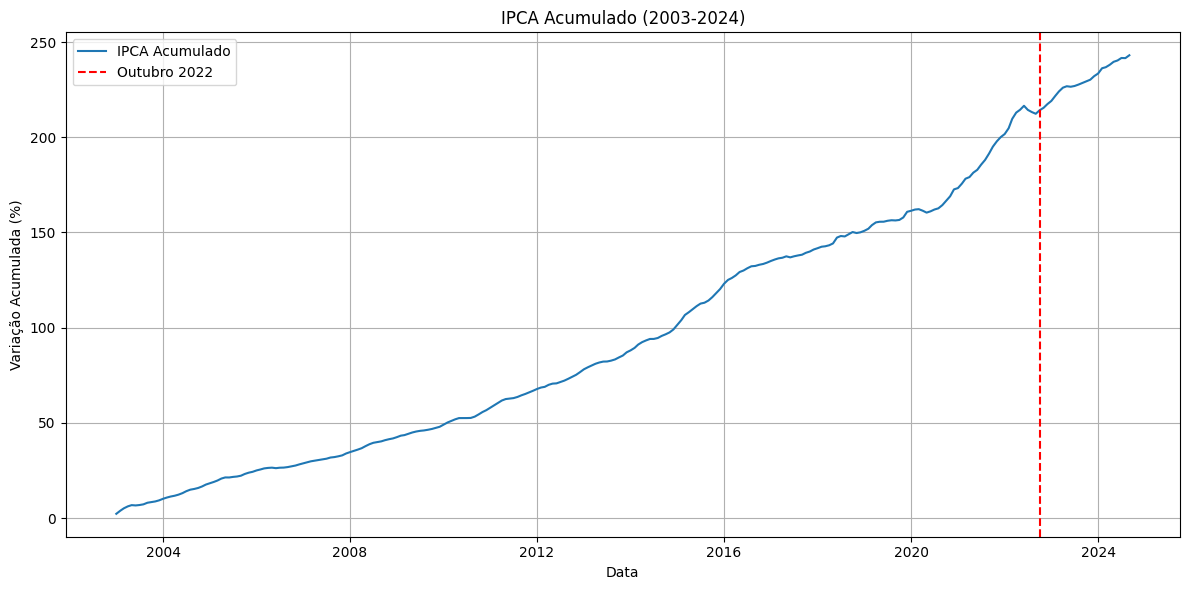

In [50]:
import matplotlib.pyplot as plt
# Preparar o gráfico com mês e ano no eixo x
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['IPCA_acum'], label='IPCA Acumulado')
plt.title('IPCA Acumulado (2003-2024)')
plt.ylabel('Variação Acumulada (%)')
plt.xlabel('Data')

# Adicionar uma linha vertical em outubro de 2022
oct_2022 = pd.Timestamp('2022-10-01')
plt.axvline(x=oct_2022, color='red', linestyle='--', label='Outubro 2022')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Filtrar dados de treinamento (até outubro de 2022) e teste (após outubro de 2022)
train = df[df['Date'] <= pd.Timestamp('2022-10-01')]
test = df[df['Date'] > pd.Timestamp('2022-09-01')]

# Variáveis independentes e dependente
X_train = train[['Selic', 'IBC_Br']]  # Adicione mais variáveis explicativas, se necessário
y_train = train['IPCA_acum']
X_test = test[['Selic', 'IBC_Br']]
y_test = test['IPCA_acum']

In [53]:
from sklearn.preprocessing import StandardScaler

# Padronizar os dados (necessário para alguns modelos como SVR e Redes Neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Lista de modelos para avaliar
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000),
}

# Avaliar modelos
results = {}

for name, model in models.items():
    # Treinar o modelo
    if name in ["SVR", "Neural Network"]:
        model.fit(X_train_scaled, y_train)  # Modelos que requerem dados escalados
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Avaliar o desempenho
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae}

    print(f"{name}: RMSE = {rmse:.4f}, MAE = {mae:.4f}")


Linear Regression: RMSE = 117.4250, MAE = 117.3617
Ridge: RMSE = 117.4179, MAE = 117.3547
Lasso: RMSE = 117.1897, MAE = 117.1275
ElasticNet: RMSE = 116.5149, MAE = 116.4543
SVR: RMSE = 153.1391, MAE = 152.9186
KNN: RMSE = 111.8830, MAE = 100.2350
Random Forest: RMSE = 95.2354, MAE = 72.5196
Gradient Boosting: RMSE = 95.4883, MAE = 74.1977
XGBoost: RMSE = 94.1786, MAE = 66.9254
Neural Network: RMSE = 111.6824, MAE = 111.5825


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Os resultados indicam que o XGBoost foi o modelo com melhor desempenho, apresentando o menor erro (RMSE = 94.1786, MAE = 66.9254), seguido de perto pelo Random Forest (RMSE = 95.2354, MAE = 72.5196) e pelo Gradient Boosting (RMSE = 95.4883, MAE = 74.1977). Esses modelos são bastante robustos e normalmente têm bom desempenho em problemas de regressão.

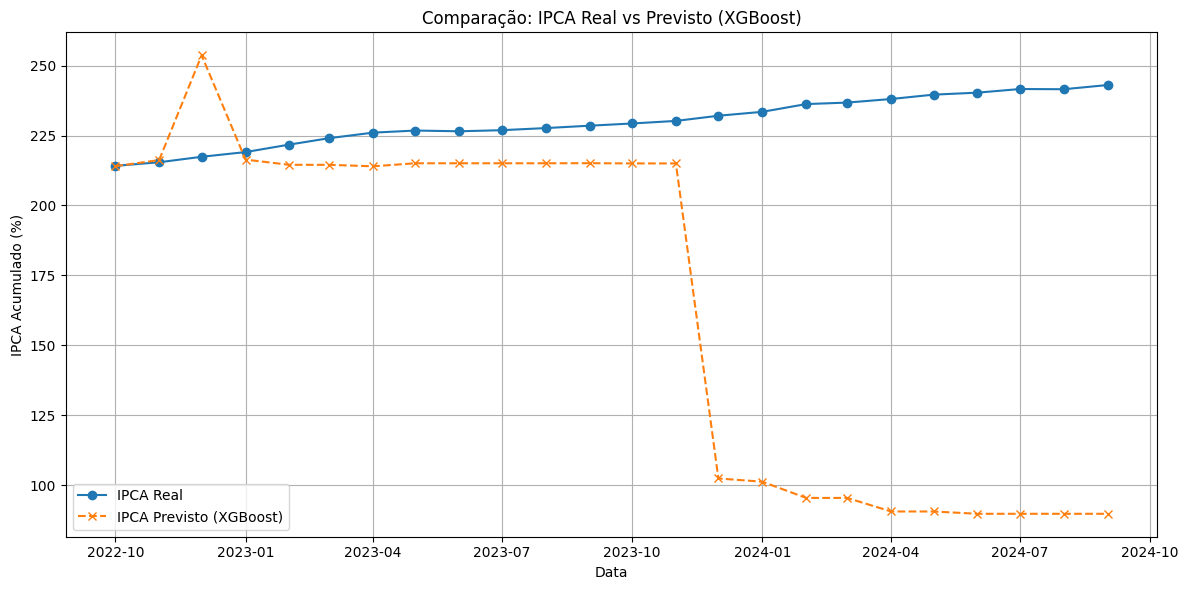

In [57]:
# Selecionar o melhor modelo (XGBoost)
best_model = models["XGBoost"]
y_pred = best_model.predict(X_test)

# Comparar os valores reais e previstos
comparison = test[['Date', 'IPCA_acum']].copy()
comparison['IPCA_pred'] = y_pred

# Plotar o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison['Date'], comparison['IPCA_acum'], label='IPCA Real', marker='o')
plt.plot(comparison['Date'], comparison['IPCA_pred'], label='IPCA Previsto (XGBoost)', linestyle='--', marker='x')
plt.title('Comparação: IPCA Real vs Previsto (XGBoost)')
plt.ylabel('IPCA Acumulado (%)')
plt.xlabel('Data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


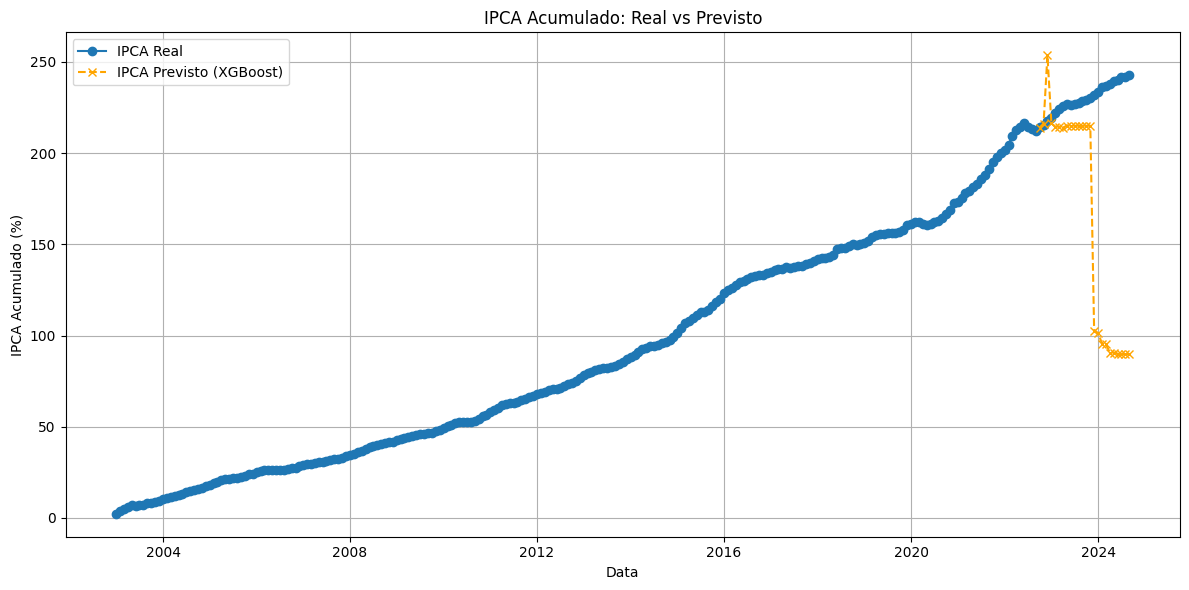

In [59]:
# Combinar os dados reais e previstos
full_comparison = df[['Date', 'IPCA_acum']].copy()
full_comparison['IPCA_pred'] = np.nan  # Inicializar com NaN para evitar erros

# Preencher os valores previstos apenas no período de teste
test_dates = test['Date'].values  # Datas do conjunto de teste
full_comparison.loc[full_comparison['Date'].isin(test_dates), 'IPCA_pred'] = y_pred

# Plotar o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotar o IPCA acumulado (real)
plt.plot(full_comparison['Date'], full_comparison['IPCA_acum'], label='IPCA Real', marker='o')

# Plotar os valores previstos apenas no período de teste
plt.plot(full_comparison['Date'], full_comparison['IPCA_pred'], label='IPCA Previsto (XGBoost)', linestyle='--', marker='x', color='orange')

# Detalhes do gráfico
plt.title('IPCA Acumulado: Real vs Previsto')
plt.ylabel('IPCA Acumulado (%)')
plt.xlabel('Data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



## 